In [1]:
import pandas as pd
import numpy as np
import plotly
import sys
import sklearn
import keras
import shap

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Importando métricas
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense, Dropout

from pickle5 import pickle

# Fixating the random seed
np.random.seed(42)

2024-02-23 16:36:36.447666: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-23 16:36:36.449152: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-23 16:36:36.479501: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-23 16:36:36.480039: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-23 16:36:36.996093: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
# Verificando as versões dos pacotes
print(f'Python: {sys.version}')
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Plotly: {plotly.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Matplotlib: {plt.matplotlib.__version__}')
print(f'Scikit-learn: {sklearn.__version__}')
print(f'Keras: {keras.__version__}')
print(f'Pickle: {pickle.format_version}')
print(f'Shap: {shap.__version__}')

Python: 3.8.10 (default, Nov 22 2023, 10:22:35) 
[GCC 9.4.0]
Pandas: 2.0.3
Numpy: 1.23.5
Plotly: 5.12.0
Seaborn: 0.12.2
Matplotlib: 3.6.3
Scikit-learn: 1.2.0
Keras: 2.12.0
Pickle: 4.0
Shap: 0.41.0


In [3]:
# Vamos utilizar apenas cpu
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

---

### 1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. 

    Seja criativo!

#### Leitura, limpeza e análise dos dados

In [4]:
path = "[LH 2024-4] Desafio de Ciência de Dados-20240216T180445Z-001/[LH 2024-4] Desafio de Ciência de Dados/teste_indicium_precificacao.csv"

df = pd.read_csv(path)
df

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
# Vamos identificar os tipos de dados que temos
df.dtypes

id                                 int64
nome                              object
host_id                            int64
host_name                         object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object

Podemos observar que há valores numéricos e categóricos. Abaixo vemos a quantidade de colunas que temos para cada tipo de variável.

In [6]:
# Vamos contar a quantidade de variaveis categoricas e numericas
df.dtypes.value_counts()

int64      7
object     6
float64    3
Name: count, dtype: int64

Outro aspecto importante na análise dos dados é a identificação de valores faltantes.

In [7]:
# Identificando a quantidade de valores nulos
df.isna().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

Para realizar o tratamento de valores faltantes podemos substitiur estes valores por alguma variável estátistica ou remover linhas ou colunas.
Para evitar a perda de informação iremos tratar os dados realizando a substituição por valores e futuramente filtraremos as `features` de interesse para o treinamento dos modelos.

In [8]:
# Vamos trocar os valores nulos da coluna reviews_por_mes pela média dos valores não nulos
df["reviews_por_mes"] = df["reviews_por_mes"].fillna(df["reviews_por_mes"].mean())
# Vamos trocar os valores nulos da coluna ultima_review pela data mediana
df['ultima_review'] = pd.to_datetime(df['ultima_review'])
df['ultima_review'] = df['ultima_review'].fillna(df['ultima_review'].median())
# Vamos trocar os valores nulos da coluna host_name por "Anonimous Host"
df["host_name"] = df["host_name"].fillna("Anonimous Host")
# Vamos trocar os valores nulos da coluna nome por "Anonimous"
df["nome"] = df["nome"].fillna("Anonimous")
df.reset_index(drop=True, inplace=True)
df

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-19,1.373251,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.590000,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-05-19,1.373251,2,9
48890,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-05-19,1.373251,2,36
48891,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-05-19,1.373251,1,27
48892,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-05-19,1.373251,6,2


In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894,48894.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,2018-11-19 17:27:21.182967296,1.373251,7.144005,112.776169
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-11-04 00:00:00,0.280000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,2019-05-19 00:00:00,1.220000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2019-06-19 00:00:00,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,NaN,1.497781,32.952855,131.618692


In [10]:
numerical = list(df.select_dtypes(include=[np.number]).columns)
numerical

['id',
 'host_id',
 'latitude',
 'longitude',
 'price',
 'minimo_noites',
 'numero_de_reviews',
 'reviews_por_mes',
 'calculado_host_listings_count',
 'disponibilidade_365']

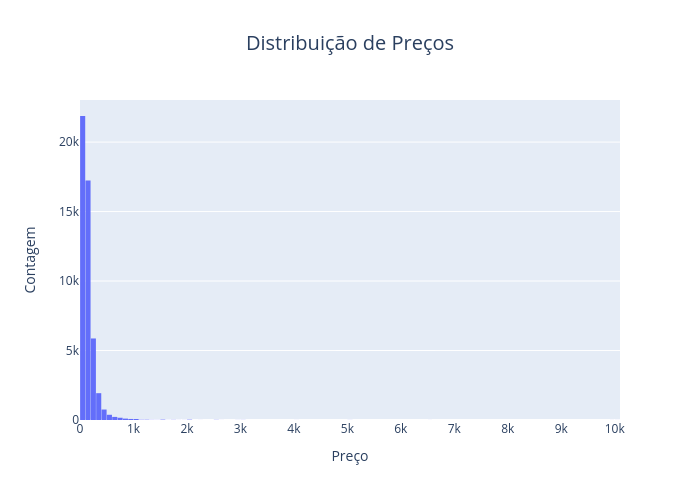

In [11]:
fig = px.histogram(df, x="price", nbins=200, title='Distribuição de Preços')
fig.update_layout(
    xaxis_title_text='Preço',
    yaxis_title_text='Contagem',
    bargap=0.05,
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 1000
    ),
    title_x=0.5,
    title_font_size=20,
)
fig.show("png")

O histograma nos mostra que a variável preço, nosso target, possui um distribuição estatística assimétrica positiva, ou seja, a maior parte dos valores se concetram a esquerda o que nos diz que há poucos anuncos com valores muito altos, a maioria se concentram em torno de $100 a $300.

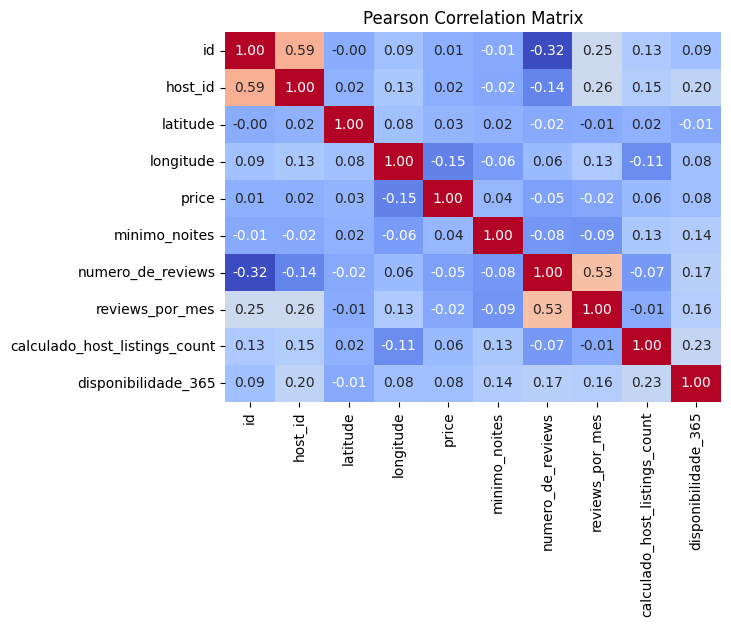

<Figure size 1000x1000 with 0 Axes>

In [12]:
df_aux = df[numerical].copy()

# Vamos ordenar o df por price
df_aux = df_aux.sort_values(by='price', ascending=True)
df_aux.reset_index(drop=True, inplace=True)

# Vamos plotar uma matrix de confusão que mostra a correlação entre as variáveis numéricas
corr = df_aux.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=False)
# Add title
plt.title('Pearson Correlation Matrix')
# Vamos rendefinir o tamanho da figura
plt.figure(figsize=(10, 10))
# Show plot
plt.show("png")

A correlação de Pearson indica se há alguma correlação linear entre duas variáveis, podemos ver que há correlação moderada entre as colunas

- host_id e id
- reviews_por_mes e numero_de_reviews

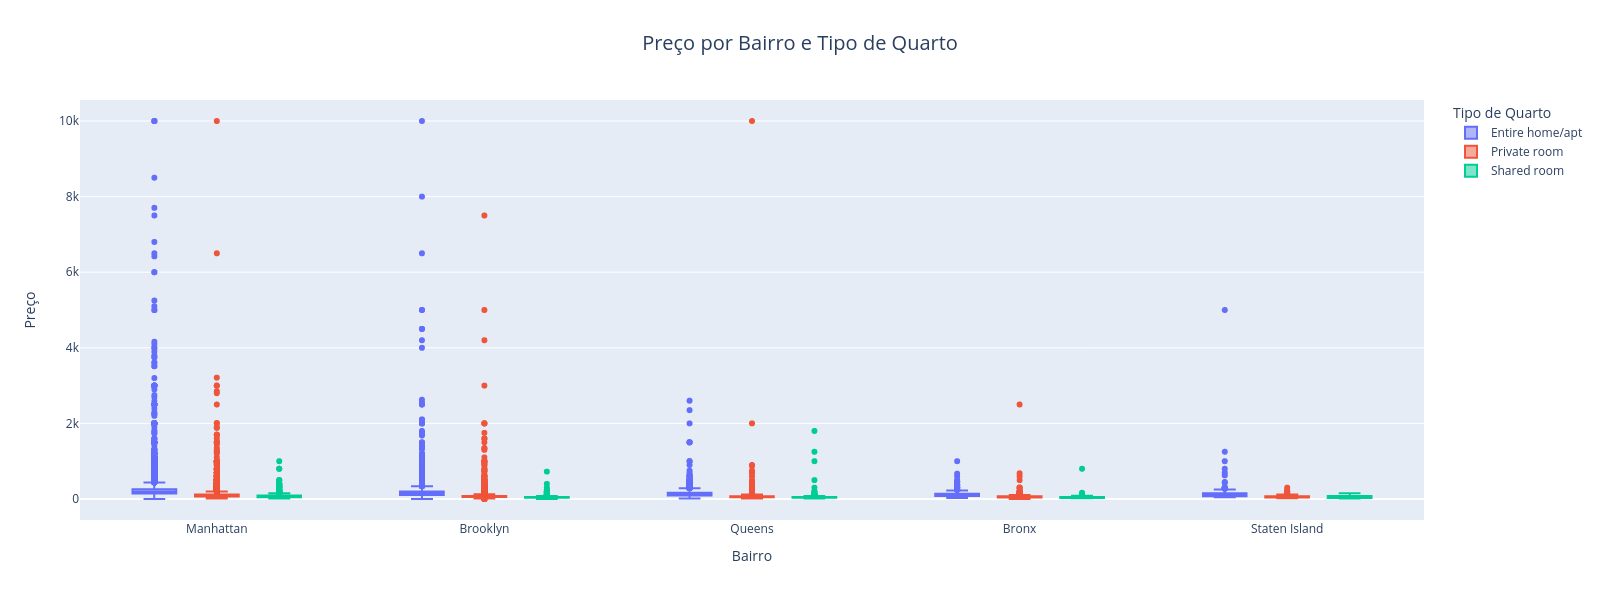

In [13]:
categorical = list(df.select_dtypes(include=['object']).columns)
df_cat = df[categorical+['price']].copy()
# df_cat = df_cat[(df_cat['bairro_group'].isin(['Queens', 'Staten Island', 'Bronx']))]

fig = px.box(
    df_cat, 
    x='bairro_group', 
    y='price', 
    color='room_type', 
    title='Preço por Bairro e Tipo de Quarto', 
    labels={'price': 'Preço', 'bairro_group': 'Bairro', 'room_type': 'Tipo de Quarto'}
)

fig.update_layout(
    xaxis_title_text='Bairro',
    yaxis_title_text='Preço',
    title_x=0.5,
    title_font_size=20,
    showlegend=True,
    width=1600,
    height=600,
)

fig.show("png")

Os gráficos boxplot revelam que nos grupos de bairro Manhattan e Brooklyn e nos tipos de quarto Entire home/apt e Private Room, possuem vários outliers revelando onde se encontram os anuncios de valores mais elevados.

Além disso, podemos ver também que apesar dessa variação é possível encontrar valores mais acessíveis em ambos os grupos de bairro e tipo de quarto.

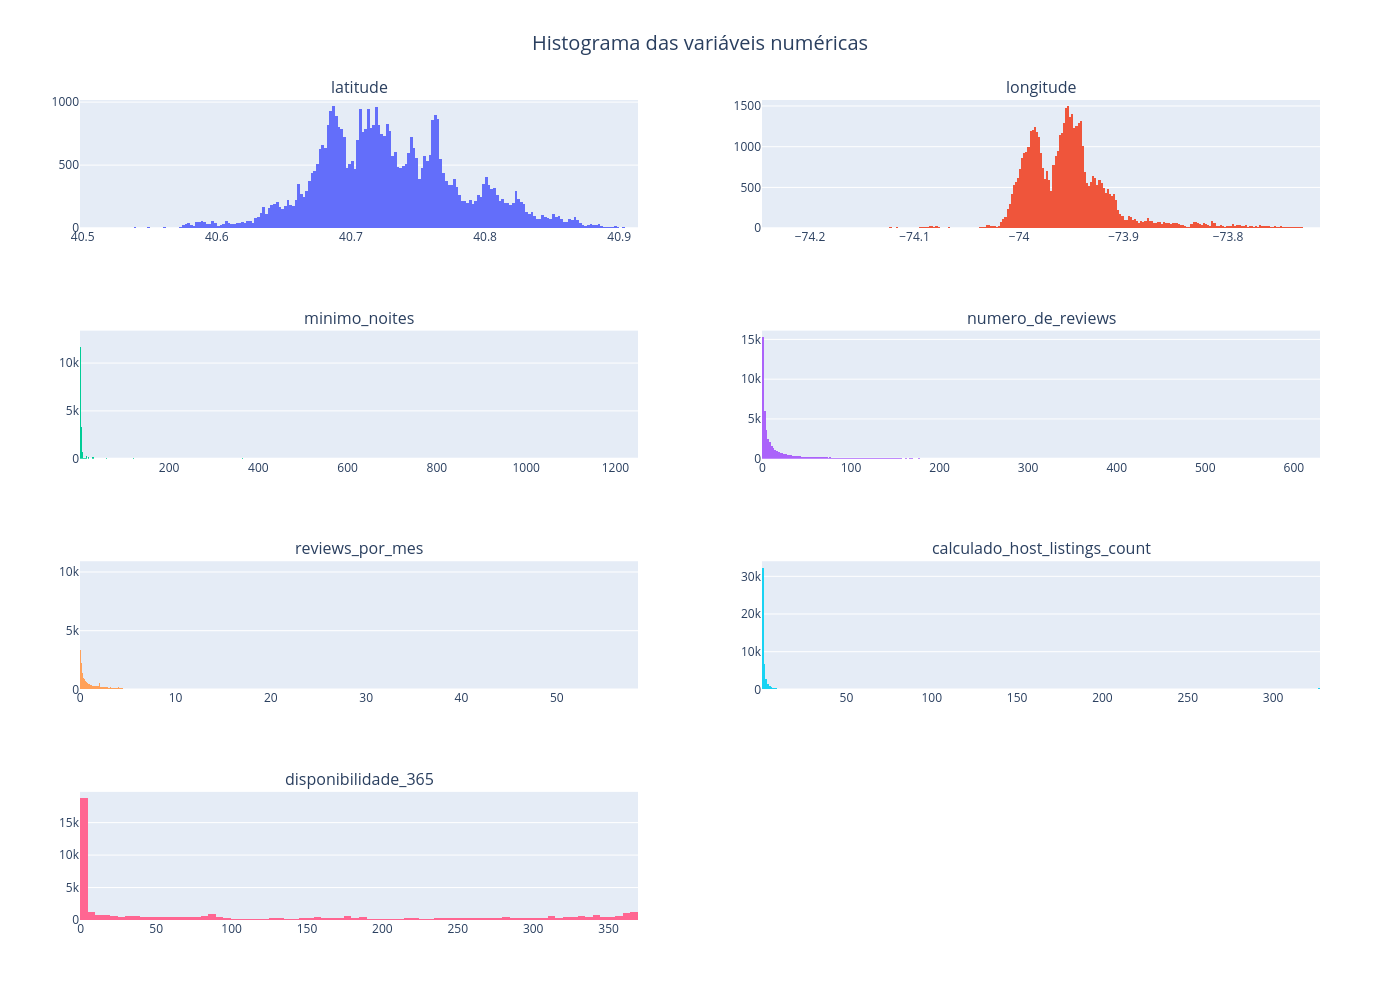

In [14]:
# vamos plotar um histograma para cada variável numérica
numerical = ['latitude', 'longitude', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 'calculado_host_listings_count', 'disponibilidade_365']

fig = make_subplots(rows=4, cols=2, subplot_titles=numerical)
for i in range(4):
    for j in range(2):
        if i*2+j < len(numerical):
            fig.add_trace(
                go.Histogram(x=df[numerical[i*2+j]], name=numerical[i*2+j]),
                row=i+1, col=j+1
            )

fig.update_layout(height=1000, width=1400, title_text="Histograma das variáveis numéricas", title_x=0.5, title_font_size=20, showlegend=False)
fig.show("png")
# for i in numerical:
#     fig = px.histogram(df, x=i, title=f'Histogram of {i}', nbins=200)
#     # Vamos rendefinir o tamanho da figura
#     fig.update_layout(width=1600, height=800)
#     fig.show("png")

In [15]:
# # Vamos plotar um gráfico de boxplot para cada variável categórica em relação ao preço
# categorical = ['bairro_group', 'room_type', 'bairro']
# for i in categorical:
#     fig = px.box(df, x=i, y='price', title=f'Price vs {i}', color="bairro_group") if i != "bairro_group" else px.box(df, x=i, y='price', title=f'Price vs {i}', color="room_type")
#     # Vamos rendefinir o tamanho da figura
#     fig.update_layout(width=1600, height=800)
#     fig.show("png")

---

### 2. Responda também às seguintes perguntas:

####     2.1. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

Como o interesse da pessoa é em alugar um apartamento iremos filtrar os apartamentos pelo tipo de espaço casa ou apartamento. Para isso, iremos selecionar apenas as opções que possuem a coluna `room_type` igual a `Entire home/apt` e olharemos a variação dos preços por cada grupo de bairro.

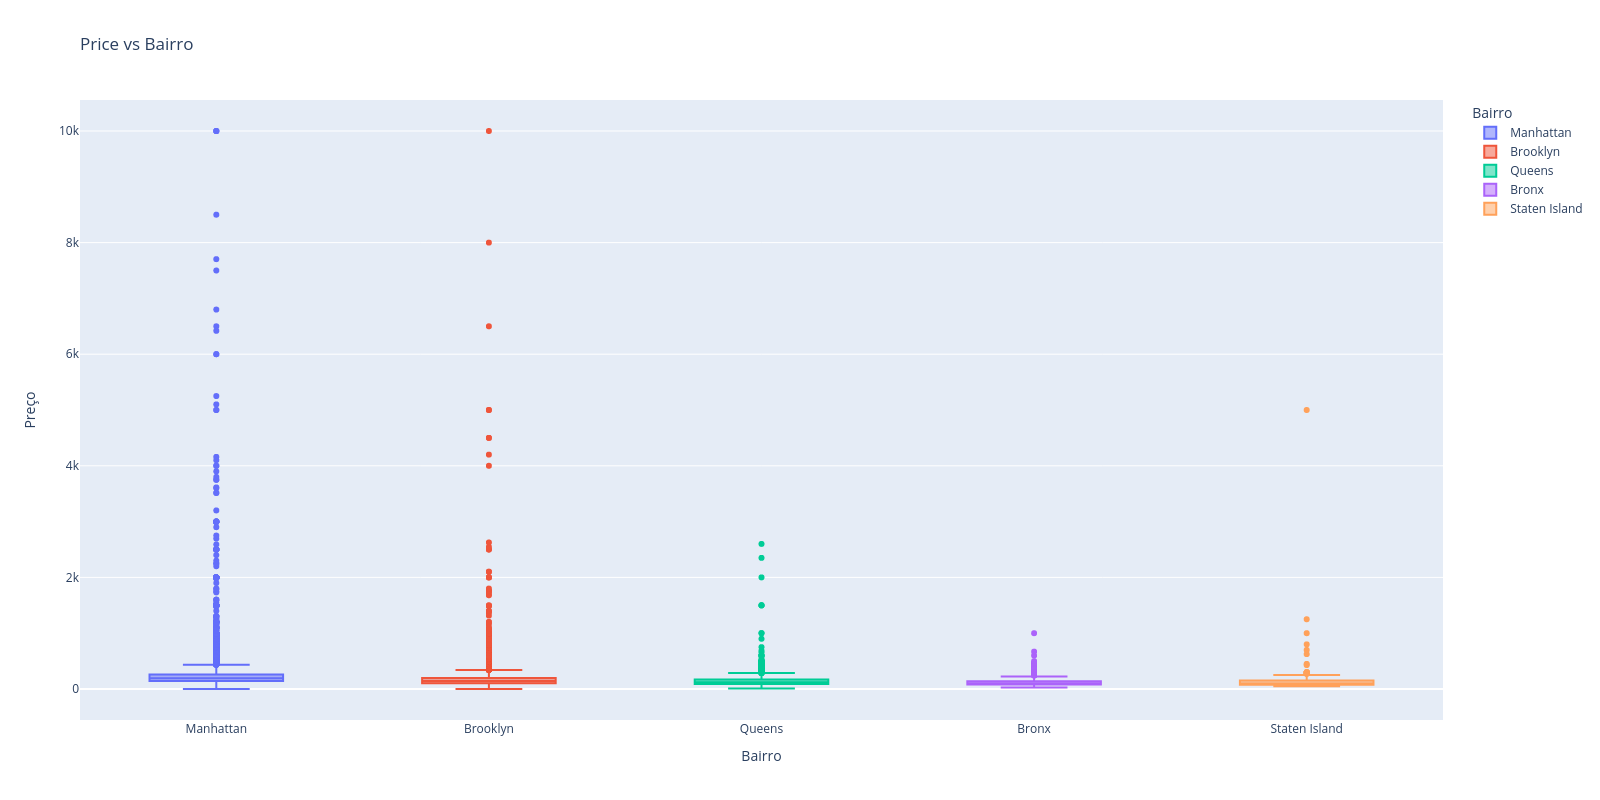

In [16]:
room_type = "Entire home/apt"
df_aux = df[df['room_type'] == room_type]
df_aux.reset_index(drop=True, inplace=True)

# Vamos plotar um boxplot que relaciona o preço com a coluna bairro
fig = px.box(df_aux, x='bairro_group', y='price', title=f'Price vs Bairro', color="bairro_group", labels={'price': 'Preço', 'bairro_group': 'Bairro'})
# Vamos rendefinir o tamanho da figura
fig.update_layout(width=1600, height=800)
fig.show("png")

Agora, vamos selecionar a opção que contém o maior valor de `reviews_por_mes`, ou seja, aquela que possuem o maior número de avaliações mensais.

In [17]:
df_aux = df_aux.sort_values(by='reviews_por_mes', ascending=False)
df_aux.reset_index(drop=True, inplace=True)
df_aux

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,28826608,“For Heaven Cakes”,217379941,Brent,Queens,Springfield Gardens,40.66457,-73.76918,Entire home/apt,75,1,132,2019-07-05,15.78,1,28
1,35495582,★ AMAZING★ TIME SQUARE/ 2 Bedroom 3 Bed Apart...,266992480,Sam,Manhattan,Hell's Kitchen,40.76573,-73.98897,Entire home/apt,500,3,14,2019-07-07,14.00,2,45
2,34150120,2 bed.Full apartment. L Train.15 min away from...,257832461,Stephanie,Brooklyn,Bushwick,40.70247,-73.92671,Entire home/apt,99,1,32,2019-07-05,13.33,1,77
3,20196339,Private Guest Suite Less than 10 min to JFK :),7097558,Louise,Queens,South Ozone Park,40.66941,-73.79148,Entire home/apt,50,1,310,2019-07-06,13.27,2,23
4,29489893,Beautiful furnished private studio with backyard,222098649,Melissa,Queens,Jamaica,40.68547,-73.79063,Entire home/apt,20,1,111,2019-07-07,13.11,1,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25404,640589,Sweet Super Bowl Accomodations,3198479,Gina,Manhattan,West Village,40.73727,-74.00213,Entire home/apt,700,5,1,2012-09-18,0.01,1,365
25405,992977,Park Slope Pre-War Apartment,4000059,Shahdiya,Brooklyn,Park Slope,40.67359,-73.97434,Entire home/apt,100,365,1,2013-08-01,0.01,1,365
25406,1987949,3 Bedroom Apt. in Washington Height,10252755,Lauren,Manhattan,Washington Heights,40.84082,-73.93896,Entire home/apt,145,3,1,2014-01-02,0.01,1,0
25407,311003,"2 BD / 2BA WITH GARDEN, SLEEPS 6",72747,Karen,Brooklyn,Crown Heights,40.67679,-73.95639,Entire home/apt,225,4,1,2013-04-21,0.01,1,342


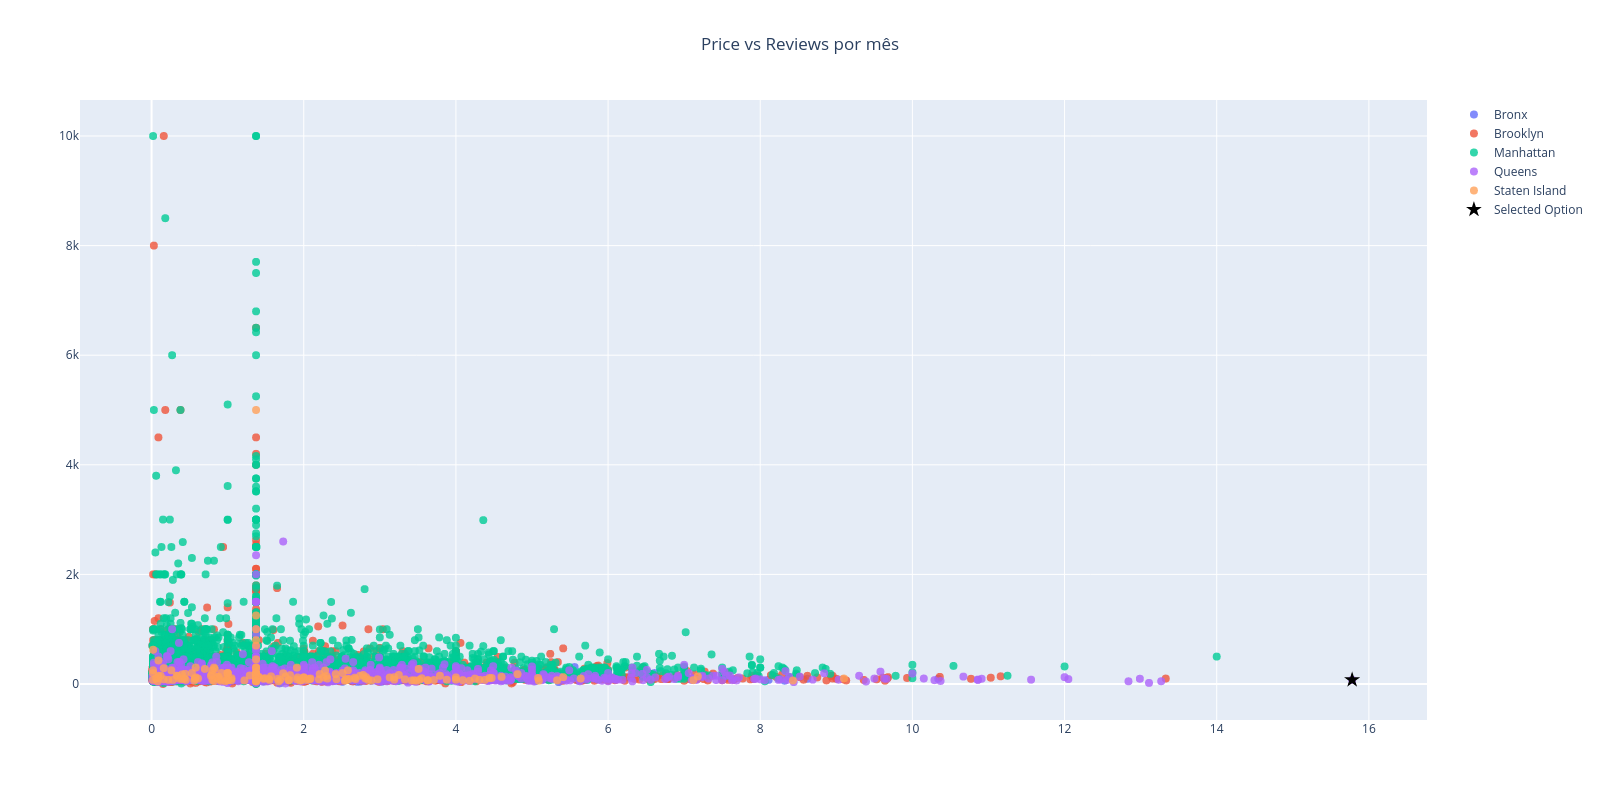

In [18]:
opcao_selecionada = df_aux.iloc[0].copy()
opcao_selecionada = opcao_selecionada.to_frame().T

# Vamos plotar um gráfico de dispersão que relaciona o preço com a coluna reviews_por_mes
fig = go.Figure()

for bairro_group, sub_df in df_aux.groupby('bairro_group'):
    fig.add_trace(
        go.Scatter(
            x=sub_df['reviews_por_mes'], 
            y=sub_df['price'],
            mode='markers', 
            name=bairro_group, 
            marker=dict(
                size=8,
                opacity=0.8
            ),
            showlegend=True
        )
    )
# Vamos rendefinir o tamanho da figura
fig.update_layout(width=1600, height=800)

# Vamos adicionar uma estrela vermelha que representa a opção selecionada
review_value = opcao_selecionada['reviews_por_mes'].values[0]
price_value = opcao_selecionada['price'].values[0]

fig.add_trace(
    go.Scatter(
        x=[review_value],
        y=[price_value],
        mode="markers",
        marker=dict(color="black", size=12, symbol="star"),
        showlegend=True,
        name="Selected Option"
    )
)

# Título do gráfico centralizado
fig.update_layout(title_text='Price vs Reviews por mês', title_x=0.5)

fig.show("png")

Portanto, a compra mais indicada seria no bairro Springfield Gardens - Queens.

In [19]:
opcao_selecionada

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,28826608,“For Heaven Cakes”,217379941,Brent,Queens,Springfield Gardens,40.66457,-73.76918,Entire home/apt,75,1,132,2019-07-05,15.78,1,28


#### 2.2. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?


In [20]:
# Vamos calcular a correlação multivariada entre as colunas minimo_noites, disponibilidade_365 e price
columns = ['minimo_noites', 'disponibilidade_365', 'price']
x, y, z = df[columns].values.T

def multi_corr(x, y, z):
    """Função que calcula a correlação multivariada entre as variáveis x, y e z.
    Parameters:
    ----------
    x : array-like
        Variável x.
    y : array-like
        Variável y.
    z : array-like

    Returns:
    -------
    float
        Correlação multivariada entre x, y e z.
    """

    r_xz = np.corrcoef(x, z)[0, 1]
    r_yz = np.corrcoef(y, z)[0, 1]
    r_xy = np.corrcoef(x, y)[0, 1]

    r_xz_y = (r_xz - r_yz * r_xy) / (np.sqrt(1 - r_yz ** 2) * np.sqrt(1 - r_xy ** 2))

    return r_xz_y

corr = multi_corr(x, y, z)
print('Correlação multivariada entre minimo_noites, disponibilidade_365 e price: {:.2f}'.format(corr))


Correlação multivariada entre minimo_noites, disponibilidade_365 e price: 0.03


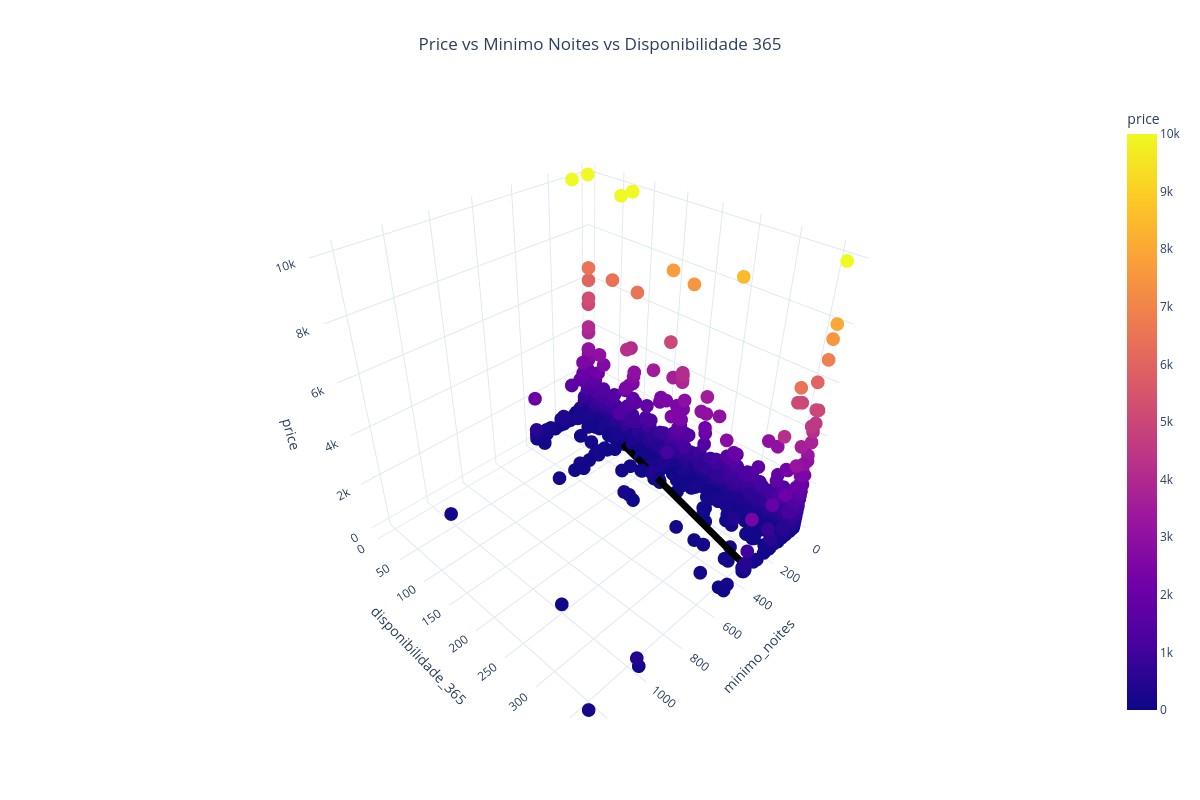

In [21]:
fig = px.scatter_3d(df, x='minimo_noites', y='disponibilidade_365', z='price', title='Price vs Minimo Noites vs Disponibilidade 365', color='price')
# Altera o template do gráfico para um fundo branco
fig.update_layout(template='plotly_white', title_x=0.5)
# Vamos rendefinir o tamanho da figura
fig.update_layout(width=1200, height=800)
# Vamos pltar a reta x=y=z
fig.add_trace(go.Scatter3d(x=[0, 365], y=[0, 365], z=[0, 365], mode='lines', name='x=y=z', line=dict(color='black', width=14), showlegend=False))
fig.show("png")

Como o valor de correlação deu próximo de zero temos que não há correlação entre as três variáveis, alé disso, podenos ver pelo gráfico acima que não há correlação entre o mínimo de noites e disponibilidade ao longo do ano com a variável preço.

#### 2.3. Existe algum padrão no texto do nome do local para lugares de mais alto valor?

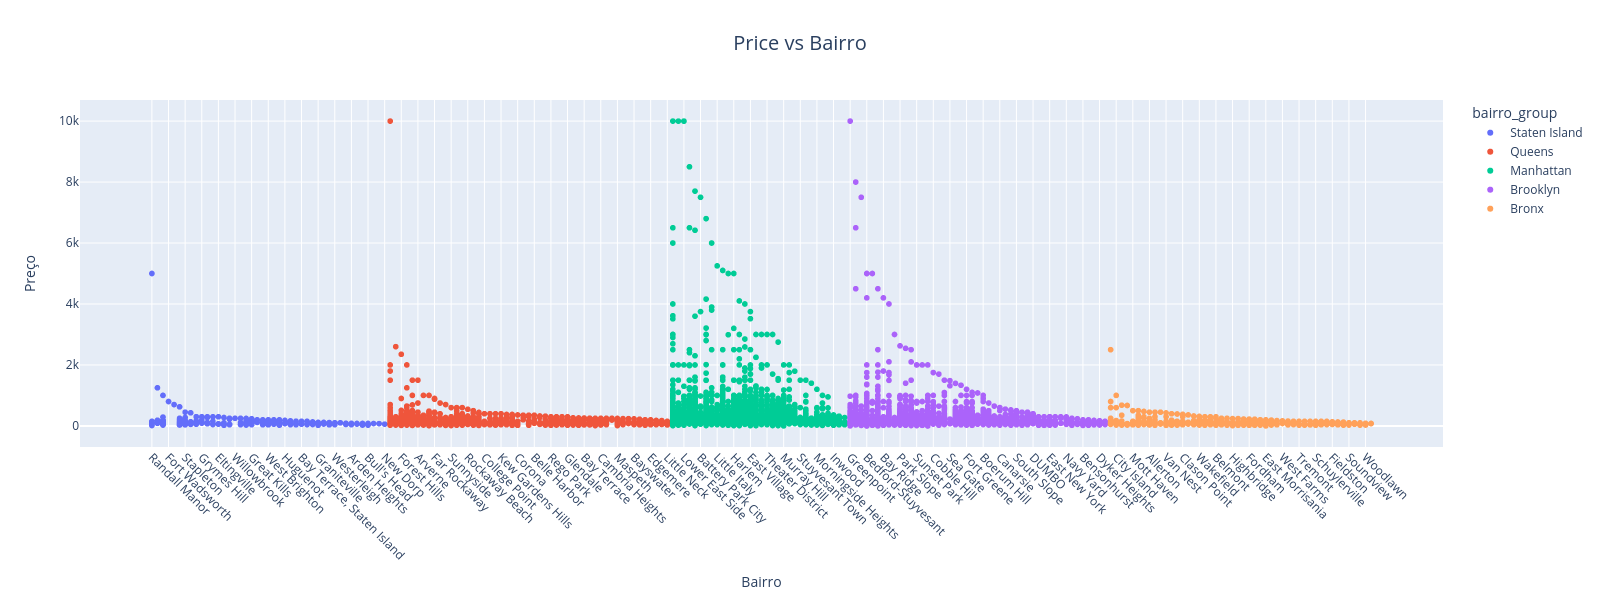

In [22]:
df_aux = df.copy()

df_aux = df_aux.sort_values(by=['bairro_group', 'price'], ascending=False)

fig = px.scatter(df_aux, y='price', x='bairro', title='Price vs Bairro', color='bairro_group', labels={'price': 'Preço', 'bairro': 'Bairro'})
# Vamos rendefinir o tamanho da figura
fig.update_layout(width=1600, height=600, title_x=0.5, title_font_size=20)
# Rotate x labels
fig.update_xaxes(tickangle=45)

fig.show("png")

Para lugares de maior valor não há necessariamente um padrão, porém a maioria deles estão localizados em Manhattan e no Broklyn.

----

### 3. Explique como você faria a previsão do preço a partir dos dados.

#### 3.1. Quais variáveis e/ou suas transformações você utilizou e por quê? 


O primeiro passo que iremos realizar é a remoção de colunas que não serão usadas para o treinamento que serão as colunas:

- id, nome, host_id, host_name, calculado_host_listings_count: pois são informações referentes a pessoa que anunciou ou o anuncio, este tipo de informação pode trazer viés para o modelo.

- bairro e bairro_group: como já temos as informações de latitude e longitude a informação bairro pode ser consideradas redudantantes.

- ultima_review: por se tratar de uma variável do tipo data e não numérica iremos remover essa informação para simplificar o tratamento dos dados.

In [23]:
df_aux = df.copy()
columns_to_remove = ['id', 'nome', 'host_id', 'host_name', 'calculado_host_listings_count', 'bairro', 'bairro_group', 'ultima_review']
df_aux = df_aux.drop(columns=columns_to_remove)

Agora, vamos analisar as colunas categoricas que sobraram

In [24]:
categorical = list(df_aux.select_dtypes(include=[np.object]).columns)

for column in categorical:
    print(f"{column}: {df_aux[column].unique()}")

room_type: ['Entire home/apt' 'Private room' 'Shared room']


/tmp/ipykernel_193202/1603497633.py:1: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Como as colunas categóricas presentes possuem mais do que dois tipos de variáveis iremos utilizar o objeto OneHotEncoder do sklearn para o tratamento dos dados onde irá adicionar novas colunas, cada uma representa uma das variáveis categóricas presentes e para cada amostra do conjunto de dados teremos o valor 0 ou 1, onde:

- 1 indica a presença da correspondente varável.
- 0 caso contrário.

In [25]:
# on_hot_encoder_group = OneHotEncoder()
# on_hot_encoder_group.fit(df_aux[['bairro_group']])
# new_features = on_hot_encoder_group.transform(df_aux[['bairro_group']]).toarray()
# new_columns = on_hot_encoder_group.get_feature_names_out(['bairro_group'])
# df_aux = pd.concat([df_aux, pd.DataFrame(new_features, columns=new_columns)], axis=1)
# df_aux = df_aux.drop(columns=['bairro_group'])

on_hot_encoder_room = OneHotEncoder()
on_hot_encoder_room.fit(df_aux[['room_type']])
new_features = on_hot_encoder_room.transform(df_aux[['room_type']]).toarray()
new_columns = on_hot_encoder_room.get_feature_names_out(['room_type'])
df_aux = pd.concat([df_aux, pd.DataFrame(new_features, columns=new_columns)], axis=1)
df_aux = df_aux.drop(columns=['room_type'])
df_aux

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,disponibilidade_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.75362,-73.98377,225,1,45,0.380000,355,1.0,0.0,0.0
1,40.80902,-73.94190,150,3,0,1.373251,365,0.0,1.0,0.0
2,40.68514,-73.95976,89,1,270,4.640000,194,1.0,0.0,0.0
3,40.79851,-73.94399,80,10,9,0.100000,0,1.0,0.0,0.0
4,40.74767,-73.97500,200,3,74,0.590000,129,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
48889,40.67853,-73.94995,70,2,0,1.373251,9,0.0,1.0,0.0
48890,40.70184,-73.93317,40,4,0,1.373251,36,0.0,1.0,0.0
48891,40.81475,-73.94867,115,10,0,1.373251,27,1.0,0.0,0.0
48892,40.75751,-73.99112,55,1,0,1.373251,2,0.0,0.0,1.0


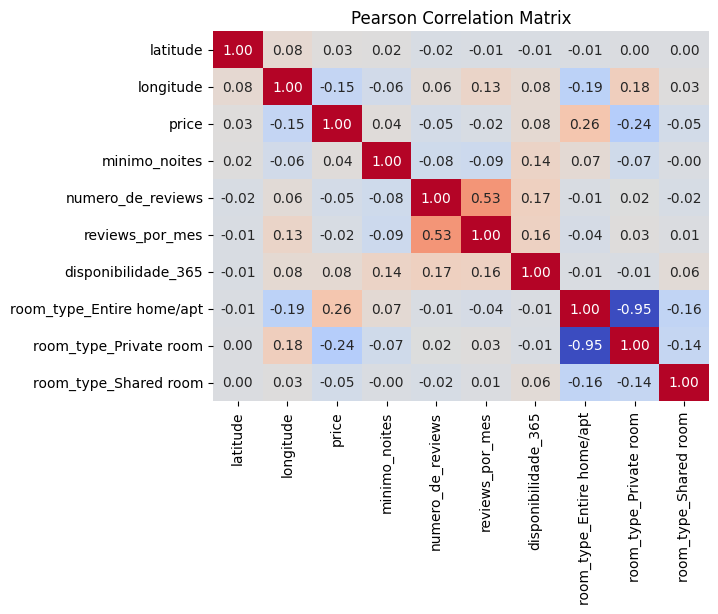

<Figure size 1000x1000 with 0 Axes>

In [26]:
# Vamos ordenar o df por price
df_aux = df_aux.sort_values(by='price', ascending=True)
df_aux.reset_index(drop=True, inplace=True)

# Vamos plotar uma matrix de confusão que mostra a correlação entre as variáveis numéricas
corr = df_aux.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=False)
# Add title
plt.title('Pearson Correlation Matrix')
# Vamos rendefinir o tamanho da figura
plt.figure(figsize=(10, 10))
# Show plot
plt.show("png")

Separando as colunas entre `features` e `target`.

In [27]:
features = [col for col in df_aux.columns if col != 'price']

target = 'price'
X = df_aux[features]
y = df_aux[target]
X

,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,disponibilidade_365,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.68258,-73.91284,1,95,4.350000,222,0.0,1.0,0.0
1,40.83296,-73.88668,2,55,2.560000,127,0.0,1.0,0.0
2,40.70838,-73.94645,5,3,0.150000,73,1.0,0.0,0.0
3,40.72462,-73.94072,2,12,0.530000,0,0.0,1.0,0.0
4,40.69166,-73.90928,30,5,0.260000,139,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
48889,40.71355,-73.98507,99,6,0.140000,83,0.0,1.0,0.0
48890,40.79264,-73.93898,5,1,0.020000,0,1.0,0.0,0.0
48891,40.76810,-73.91651,100,2,0.040000,0,0.0,1.0,0.0
48892,40.73260,-73.95739,5,5,0.160000,0,1.0,0.0,0.0


In [28]:
features

['latitude',
 'longitude',
 'minimo_noites',
 'numero_de_reviews',
 'reviews_por_mes',
 'disponibilidade_365',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room']

In [29]:
print("Total de features:", len(features))

Total de features: 9


Agora, é necessário separar os dados em treino, validação e teste.

Como temos valores muito altos em algumas colunas e valores binários em outras utilizaremos o StandardScaler para normalizar os dados deixando cada coluna com média zero e desvio padrão igual a 1.

- Obs: A normalização deve ser feita apenas nos dados de treino.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Splitting the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

# Creating the StandardScaler
scaler = StandardScaler()

# Fitting the scaler
scaler.fit(X_train)

# Transforming the data
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

#### 3.2. Qual tipo de problema estamos resolvendo (regressão, classificação)? 

Como nosso problema se resume em previsão de preço que pode ser qualquer valor numérico (em outras palavras, um valor contínuo) o problema abordado é de regressão.

Agora iremos realizar o treinamento de diferentes modelos de regressão, sendo eles:

- Linear Regression
- Lasso
- Ridge
- Elastic Net
- Random Forest
- SVR
- Decision Tree
- Neural Network

E avaliaremos todos eles utilizando os dados de validação e com o erro quadrático médio.

In [31]:
def build_model(input_dim):
    """Função que cria um modelo de rede neural.
    Parameters:
    ----------
    input_dim : int
        Número de features.

    Returns:
    -------
    keras.models.Sequential
        Modelo de rede neural.
    """

    # Fixando a seed para reproducibilidade
    keras.utils.set_random_seed(42)
    keras.backend.clear_session()
    
    model = Sequential()
    model.add(Dense(32, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

In [32]:
models = {
    "Linear Regression": None,
    "Lasso": None,
    "Ridge": None,
    "Elastic Net": None,
    "Random Forest": None,
    "SVR": None,
    "Decision Tree": None,
    "Neural Network": None,
}

mses = {model: float('inf') for model in models.keys()}

min_mse = float('inf')
best_model = None

In [33]:
# Fixando a seed para reproducibilidade
seed = 42

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
error = mean_squared_error(y_val, y_pred)
mses["Linear Regression"] = error
print(f"Mean Squared Error (Linear Regression): {error}")
print("#"*100, "\n")
models["Linear Regression"] = model

model = Lasso(random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
error = mean_squared_error(y_val, y_pred)
mses["Lasso"] = error
print(f"Mean Squared Error (Lasso): {error}")
print("#"*100, "\n")
models["Lasso"] = model

model = Ridge(random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
error = mean_squared_error(y_val, y_pred)
mses["Ridge"] = error
print(f"Mean Squared Error (Ridge): {error}")
print("#"*100, "\n")
models["Ridge"] = model

model = ElasticNet(random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
error = mean_squared_error(y_val, y_pred)
mses["Elastic Net"] = error
print(f"Mean Squared Error (Elastic Net): {error}")
print("#"*100, "\n")
models["Elastic Net"] = model

model = DecisionTreeRegressor(random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
error = mean_squared_error(y_val, y_pred)
mses["Decision Tree"] = error
print(f"Mean Squared Error (Decision Tree): {error}")
print("#"*100, "\n")
models["Decision Tree"] = model

model = RandomForestRegressor(random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
error = mean_squared_error(y_val, y_pred)
mses["Random Forest"] = error
print(f"Mean Squared Error (Random Forest): {error}")
print("#"*100, "\n")
models["Random Forest"] = model

model = SVR(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
error = mean_squared_error(y_val, y_pred)
mses["SVR"] = error
print(f"Mean Squared Error (SVR): {error}")
print("#"*100, "\n")
models["SVR"] = model

Mean Squared Error (Linear Regression): 53773.82309207528
#################################################################################################### 

Mean Squared Error (Lasso): 53754.901639654905
#################################################################################################### 

Mean Squared Error (Ridge): 53773.68382057006
#################################################################################################### 

Mean Squared Error (Elastic Net): 54031.26744374019
#################################################################################################### 

Mean Squared Error (Decision Tree): 109429.76471423701
#################################################################################################### 

Mean Squared Error (Random Forest): 57522.619867682646
#################################################################################################### 

Mean Squared Error (SVR): 55558.08371947443
#########################

In [34]:
input_dim = X_train.shape[1]
model = build_model(input_dim)
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val), verbose=1)
y_pred = model.predict(X_val)
error = mean_squared_error(y_val, y_pred)
mses["Neural Network"] = error
print(f"Mean Squared Error (Neural Network): {error}")
print("#"*100, "\n")
models["Neural Network"] = model

Epoch 1/100


2024-02-23 16:36:54.634591: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-02-23 16:36:54.634619: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: patrick-Inspiron-15-5510
2024-02-23 16:36:54.634623: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: patrick-Inspiron-15-5510
2024-02-23 16:36:54.634735: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 530.30.2
2024-02-23 16:36:54.634749: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 530.30.2
2024-02-23 16:36:54.634753: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 530.30.2


31/31 [==============================] - 1s 9ms/step - loss: 75383.5547 - val_loss: 81962.2422
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 74913.6562 - val_loss: 81306.0156
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 73832.9375 - val_loss: 79659.4062
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 71546.1484 - val_loss: 75981.9297
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 66645.5156 - val_loss: 69401.0625
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 59637.5000 - val_loss: 61060.8086
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 54457.5469 - val_loss: 56261.3320
Epoch 8/100
31/31 [==============================] - 0s 5ms/step - loss: 53266.6211 - val_loss: 55139.0273
Epoch 9/100
31/31 [==============================] - 0s 7ms/step - loss: 51230.1328 - val_loss: 54604.4531
Epoch 10/100
31/31 [=============================

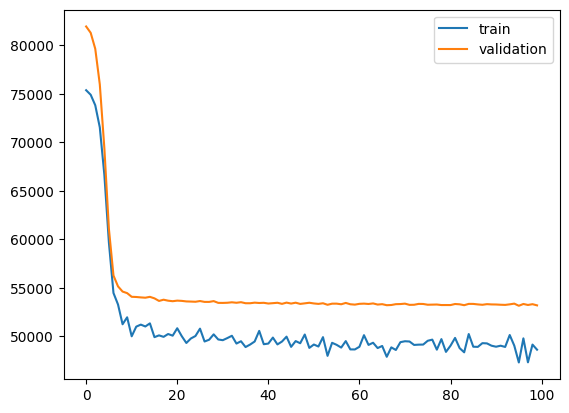

In [35]:
# Let's plot the losses
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show("png")

#### 3.3. Qual modelo melhor se aproxima dos dados e quais seus prós e contras? 


Para selecionar o melhor modelo realizamos o treinamento e escolhemos aquele que obteve o menor erro a partir dos dados de validação.

In [36]:
for model_name, mse in mses.items():
    if mse < min_mse:
        min_mse = mse
        best_model_name = model_name

best_model = models[best_model_name]
print(f"Best model: {best_model_name} with MSE: {min_mse}")

Best model: Neural Network with MSE: 53180.61940360232


In [37]:
# Vamos avaliar o melhor modelo no conjunto de teste
y_pred = best_model.predict(X_test)
error = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Test): {error}")

306/306 [==============================] - 0s 579us/step
Mean Squared Error (Test): 49450.72672907258


In [38]:
df_error = pd.DataFrame(mses.items(), columns=['Model', 'MSE'])
df_error = df_error.sort_values(by='MSE', ascending=True)
df_error['MSE'] = df_error['MSE'].round(2)
df_error.reset_index(drop=True, inplace=True)
df_error

,Model,MSE
0,Neural Network,53180.62
1,Lasso,53754.90
2,Ridge,53773.68
3,Linear Regression,53773.82
4,Elastic Net,54031.27
5,SVR,55558.08
6,Random Forest,57522.62
7,Decision Tree,109429.76


Após as análises o modelo que melhor obteve melhor desempenho foi a rede neural. 
Apesar disso, se compararmos com os modelos lineares ela não obteve uma grande diferença.
Mas quais são as vantagens e desvantagens do uso de uma rede neural?

- Vantagens:
    1. Tem a capacidade de resolver problemas mais complexos
    2. Tem a capacidade de aprender contínuamente
    3. Consegue filtrar bem possíveis ruídos
    4. Mesmo que uma parte da rede falhe, toda a rede ainda poderá funcionar.

- Desvantagens:
    1. Difícil de interpretar (modelo caixa preta)
    2. Custo computacional mais alto para realizar o treinamento
    3. Precisa de muito mais dados para generalizar
    4. Às vezes, elas podem memorizar dados em vez de aprender com eles causando overfitting.

--- 

#### 3.4. Qual medida de performance do modelo foi escolhida e por quê?

Como se trata de um problema de regressão foi utilizado a medida erro quadrático médio para avaliar o desempenho dos modelos.

----

### 4. Supondo um apartamento com as seguintes características:


    {'id': 2595, 

    'nome': 'Skylit Midtown Castle',
    
    'host_id': 2845,

    'host_name': 'Jennifer',

    'bairro_group': 'Manhattan',
    
    'bairro': 'Midtown',
    
    'latitude': 40.75362,
    
    'longitude': -73.98377,
    
    'room_type': 'Entire home/apt',
    
    'price': 225,
    
    'minimo_noites': 1,
    
    'numero_de_reviews': 45,
    
    'ultima_review': '2019-05-21',
    
    'reviews_por_mes': 0.38,
    
    'calculado_host_listings_count': 2,
    
    'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?

In [39]:
sample = {
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'price': 225,
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}

data = pd.DataFrame(data=sample, index=[0])
data

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [40]:
sampĺe = data.copy()
sample = pd.DataFrame(data=sample, index=[0])

# new_features = on_hot_encoder_group.transform(sample[['bairro_group']]).toarray()
# new_columns = on_hot_encoder_group.get_feature_names_out(['bairro_group'])

# sample = pd.concat([sample, pd.DataFrame(new_features, columns=new_columns)], axis=1)
# sample = sample.drop(columns=['bairro_group'])

new_features = on_hot_encoder_room.transform(sample[['room_type']]).toarray()
new_columns = on_hot_encoder_room.get_feature_names_out(['room_type'])

sample = pd.concat([sample, pd.DataFrame(new_features, columns=new_columns)], axis=1)
sample = sample.drop(columns=['room_type'])

sample = sample[features]
sample = scaler.transform(sample[features])
sample

array([[ 0.43279566, -0.69725879, -0.25414358,  0.53822962, -0.67808817,
         1.86177289,  0.97549823, -0.92864469, -0.1586311 ]])

In [41]:
print("A sugestão de preço dada pelo modelo é: $", np.round(best_model.predict(sample)[0], 2)[0])
print("O preço real é $", data['price'][0])

1/1 [==============================] - 0s 16ms/step
A sugestão de preço dada pelo modelo é: $ 260.54
O preço real é $ 225


#### Plus

Como estamos tratando de um modelo caixa preta, abaixo utilizamos a técnica de xAI SHAP para explicar as razões que nosso modelo forneceu o determinado preço.

In [42]:
import shap
shap.initjs()

/home/patrick/.local/lib/python3.8/site-packages/shap/explainers/_deep/deep_tf.py:95: UserWarning:

keras is no longer supported, please use tf.keras instead.

/home/patrick/.local/lib/python3.8/site-packages/shap/explainers/_deep/deep_tf.py:100: UserWarning:

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.

/home/patrick/.local/lib/python3.8/site-packages/keras/backend.py:452: UserWarning:

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.



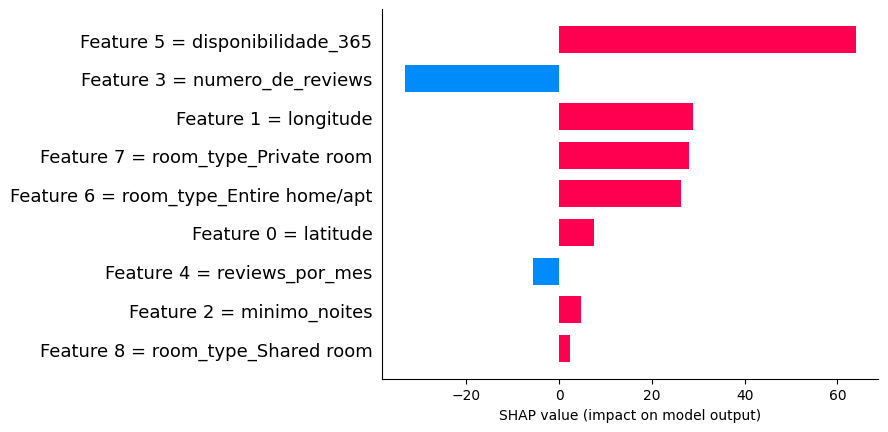

In [43]:
if best_model_name == "Neural Network":
    explainer = shap.DeepExplainer(best_model, X_train[:100])
    shap_values = explainer.shap_values(sample)

    shap.bar_plot(shap_values[0][0], features=features, show=True, max_display=10)
    plt.show("png")

elif best_model in ["Decision Tree", "Random Forest"]:
    explainer = shap.TreeExplainer(best_model, X_train[:100])
    shap_values = explainer.shap_values(sample)

    shap.bar_plot(shap_values[0], features=features, show=True, max_display=10)
    plt.show("png")

else:
    explainer = shap.KernelExplainer(best_model.predict, X_train[:100])
    shap_values = explainer.shap_values(sample)

    shap.bar_plot(shap_values[0], features=features, show=True, max_display=10)
    plt.show("png")

As barras em vermelho indicam a contribuição de cada `feature`, barras em vermelho indicam o quanto a variável contribuiu positivamente para o preço e barras em azul indicam o quanto a variável contribuiu negativamente no preço.

----

### 5. Salve o modelo desenvolvido no formato .pkl.

In [44]:
# Vamos salvar o modelo em pkl

with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)